In [ ]:
Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.


In [1]:
import pandas as pd

In [27]:
df=pd.read_csv('emails.csv')

In [6]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [8]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [11]:
print(df.dtypes)


Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object


In [12]:
print(df.isnull().sum())


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [13]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [14]:
X

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]], dtype=int64)

In [15]:
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = classifier.predict(X_test)


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[866, 248],
       [ 16, 422]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
cl_report=classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1114
           1       0.63      0.96      0.76       438

    accuracy                           0.83      1552
   macro avg       0.81      0.87      0.81      1552
weighted avg       0.88      0.83      0.84      1552



In [23]:
print("Accuracy Score for KNN : ", accuracy_score(y_pred,y_test))

Accuracy Score for KNN :  0.8298969072164949


KNN Accuracy: 0.9893719806763285


In [43]:
df['Prediction']

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [57]:
# Define the target variable
X=df.drop('Prediction',axis=1)
y = df['Prediction']


In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print(X_train.shape, X_test.shape)


(4137, 3001) (1035, 3001)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


ValueError: could not convert string to float: 'Email 3165'

In [47]:
from sklearn.metrics import precision_score

# Precision of the KNN model
knn_precision = precision_score(y_test, y_pred_knn)
print("KNN Precision:", knn_precision)


KNN Precision: 0.7251461988304093


In [48]:
from sklearn.metrics import recall_score

# Recall of the KNN model
knn_recall = recall_score(y_test, y_pred_knn)
print("KNN Recall:", knn_recall)


KNN Recall: 0.8378378378378378


In [49]:
from sklearn.metrics import f1_score

# F1-Score of the KNN model
knn_f1 = f1_score(y_test, y_pred_knn)
print("KNN F1-Score:", knn_f1)


KNN F1-Score: 0.7774294670846394


KNN Confusion Matrix:
 [[645  94]
 [ 48 248]]


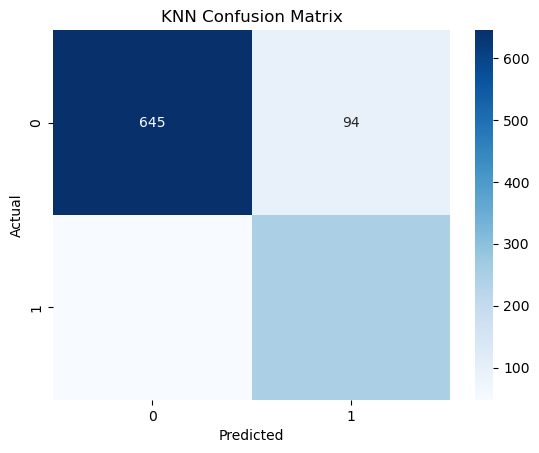

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", cm_knn)

# Visualizing the confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [51]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

SVM Accuracy: 0.9594202898550724


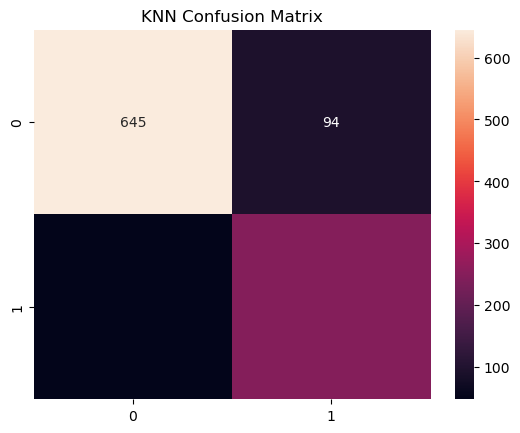

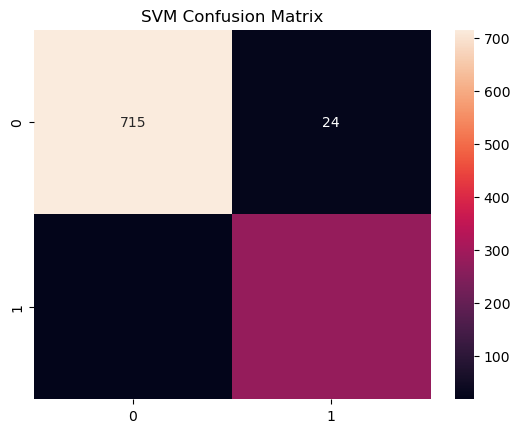

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.show()

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()


In [53]:
from sklearn.metrics import precision_score

# Precision of the SVM model
svm_precision = precision_score(y_test, y_pred_svm)
print("SVM Precision:", svm_precision)


SVM Precision: 0.9205298013245033


In [54]:
from sklearn.metrics import recall_score

# Recall of the SVM model
svm_recall = recall_score(y_test, y_pred_svm)
print("SVM Recall:", svm_recall)


SVM Recall: 0.9391891891891891


In [55]:
from sklearn.metrics import f1_score

# F1-Score of the SVM model
svm_f1 = f1_score(y_test, y_pred_svm)
print("SVM F1-Score:", svm_f1)


SVM F1-Score: 0.9297658862876255


SVM Confusion Matrix:
 [[715  24]
 [ 18 278]]


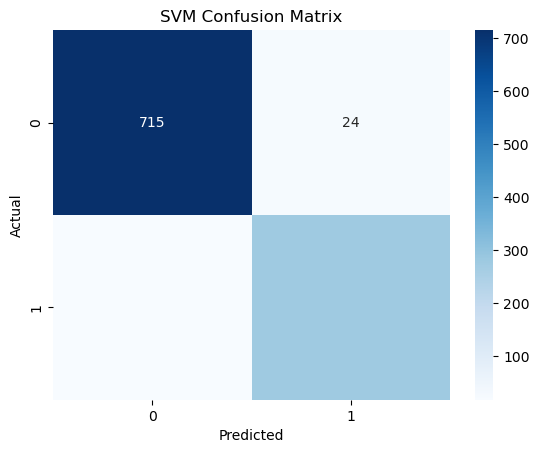

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", cm_svm)

# Visualizing the confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
